In [5]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import imblearn
from collections import Counter

In [6]:
df = pd.read_csv('Classification_Datasest.csv')

In [7]:
#Set 'device' column to 0 (Staff Member) / 1 (Trump)

df.device.replace(to_replace = 'Staff Member' , value = 0 , inplace = True)
df.device.replace(to_replace = 'Trump' , value = 1 , inplace = True)

In [8]:
df.device.value_counts()

0    3381
1    2056
Name: device, dtype: int64

## Create Train / Test Dataset

In [9]:
X = df.drop(['text' , 'date' , 'time' , 'neg' , 'neu' , 'pos' , 'device'] , axis = 1)
y = df['device']

In [10]:
X

,favorites,retweets,punctuation,url,hour,month,sentiment,topic
0,419,275,1,0,12,6,0.5622,1
1,135,46,0,1,12,6,0.4404,8
2,763,400,1,0,13,6,0.0000,5
3,164,66,0,0,13,6,0.3182,5
4,306,175,1,1,14,6,0.0000,7
...,...,...,...,...,...,...,...,...
5432,76003,16366,2,1,17,3,0.8286,0
5433,58348,11477,1,1,13,3,0.7906,5
5434,88209,18187,1,0,14,3,0.7584,5
5435,43089,8203,0,0,14,3,0.0000,2


In [11]:
from sklearn.model_selection import train_test_split

#Split data into 3 sets: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

## Feature Scaling and Splitting Dataset

In [12]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [13]:
#Fit scaler model
scaler = StandardScaler()
scaler.fit(X_train.values)

StandardScaler()

In [15]:
#Scaling Training Data
X_tr = scaler.transform(X_train.values)
X_te = scaler.transform(X_test.values)

In [16]:
#Confirm scaling worked by checking standard deviation of features
X_tr.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1.])

In [17]:
#Confirm scaling worked by checking mean of features
X_tr.mean(axis=0)

array([-6.20846722e-17,  5.39156364e-17, -3.26761433e-17,  1.12732694e-16,
       -3.02254325e-17,  1.25803152e-16, -2.53240110e-17,  1.14366502e-16])

In [18]:
X_tr.shape

(4349, 8)

### Buliding Classification Models

Creating LogReg and Naive Bayes models and plotting out the ROC Curve to visualize fit then a confusion matrix to compare results.

In [20]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score , precision_score

### Logistic Regression Model

In [114]:
#Logistic Regression Baseline Model
lr = LogisticRegression(C=10)

lr.fit(X_tr, y_train)
y_pred = lr.predict(X_te)

,LogReg
Accuracy,0.804
Precision,0.669
Recall,0.9
F1 Score,0.767


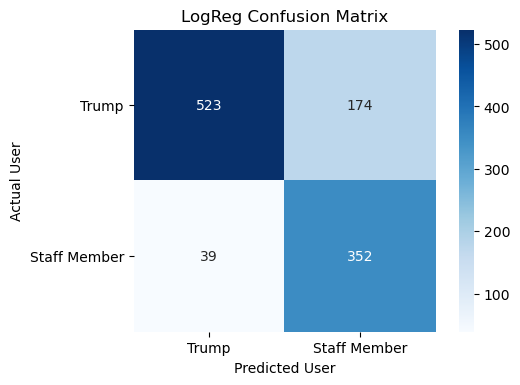

In [115]:
#Log Reg Confusion matrix
lr_cm = confusion_matrix(y_test, y_pred)

plt.figure(dpi=100)
sns.heatmap(lr_cm, cmap=plt.cm.Blues, annot=True, square=True, fmt = 'd',
           xticklabels=['Trump','Staff Member'],
           yticklabels=['Trump','Staff Member'])
plt.xlabel('Predicted User')
plt.ylabel('Actual User')
plt.title('LogReg Confusion Matrix')
plt.yticks(rotation=0);

true_neg, false_pos = lr_cm[0]
false_neg, true_pos = lr_cm[1]

accuracy = round((true_pos + true_neg) / (true_pos + true_neg + false_pos + false_neg),3)
precision = round((true_pos) / (true_pos + false_pos),3)
recall = round((true_pos) / (true_pos + false_neg),3)
f1 = round(2 * (precision * recall) / (precision + recall),3)

lr_temp = pd.DataFrame(columns = ['LogReg'] , 
                       index = ['Accuracy', 'Precision', 'Recall', 'F1 Score'])

lr_temp.loc['Accuracy'] = accuracy
lr_temp.loc['Precision'] = precision
lr_temp.loc['Recall'] = recall
lr_temp.loc['F1 Score'] = f1

lr_temp

### XGBoost Model

In [116]:
#XGBoost Model
xgb_cl = xgb.XGBClassifier(n_estimators = 100 , max_depth = 5) 

xgb_cl.fit(X_tr, y_train)
y_pred = xgb_cl.predict(X_te)

[00:59:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\jayju\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


,XGBoost
Accuracy,0.858
Precision,0.785
Recall,0.831
F1 Score,0.807


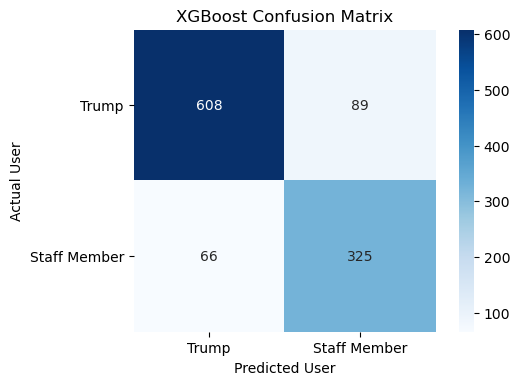

In [117]:
#XGBoost confusion matrix
xgb_cm = confusion_matrix(y_test, y_pred)

plt.figure(dpi=100)
sns.heatmap(xgb_cm, cmap=plt.cm.Blues, annot=True, square=True, fmt = 'd',
           xticklabels=['Trump','Staff Member'],
           yticklabels=['Trump','Staff Member'])
plt.xlabel('Predicted User')
plt.ylabel('Actual User')
plt.title('XGBoost Confusion Matrix')
plt.yticks(rotation=0);

true_neg, false_pos = xgb_cm[0]
false_neg, true_pos = xgb_cm[1]

accuracy = round((true_pos + true_neg) / (true_pos + true_neg + false_pos + false_neg),3)
precision = round((true_pos) / (true_pos + false_pos),3)
recall = round((true_pos) / (true_pos + false_neg),3)
f1 = round(2 * (precision * recall) / (precision + recall),3)

xgb_temp = pd.DataFrame(columns = ['XGBoost'] , 
                       index = ['Accuracy', 'Precision', 'Recall', 'F1 Score'])

xgb_temp.loc['Accuracy'] = accuracy
xgb_temp.loc['Precision'] = precision
xgb_temp.loc['Recall'] = recall
xgb_temp.loc['F1 Score'] = f1

xgb_temp

### Random Forest Model

In [118]:
#Random Forest Baseline Model
rf = RandomForestClassifier(max_depth = 10)

rf.fit(X_tr, y_train)
y_pred = rf.predict(X_test)

C:\Users\jayju\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


,Random Forest
Accuracy,0.767
Precision,0.608
Recall,0.995
F1 Score,0.755


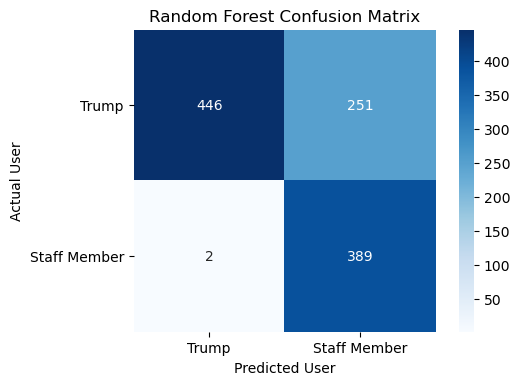

In [119]:
#Random Forest confusion matrix
rf_cm = confusion_matrix(y_test, y_pred)

plt.figure(dpi=100)
sns.heatmap(rf_cm, cmap=plt.cm.Blues, annot=True, square=True, fmt = 'd',
           xticklabels=['Trump','Staff Member'],
           yticklabels=['Trump','Staff Member'])
plt.xlabel('Predicted User')
plt.ylabel('Actual User')
plt.title('Random Forest Confusion Matrix')
plt.yticks(rotation=0);

true_neg, false_pos = rf_cm[0]
false_neg, true_pos = rf_cm[1]

accuracy = round((true_pos + true_neg) / (true_pos + true_neg + false_pos + false_neg),3)
precision = round((true_pos) / (true_pos + false_pos),3)
recall = round((true_pos) / (true_pos + false_neg),3)
f1 = round(2 * (precision * recall) / (precision + recall),3)

rf_temp = pd.DataFrame(columns = ['Random Forest'] , 
                       index = ['Accuracy', 'Precision', 'Recall', 'F1 Score'])

rf_temp.loc['Accuracy'] = accuracy
rf_temp.loc['Precision'] = precision
rf_temp.loc['Recall'] = recall
rf_temp.loc['F1 Score'] = f1

rf_temp

### kNN Model

In [120]:
#KNN Baseline Model
kNN = KNeighborsClassifier(n_neighbors = 3)

kNN.fit(X_tr, y_train)
y_pred = kNN.predict(X_test)

C:\Users\jayju\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


,kNN
Accuracy,0.359
Precision,0.359
Recall,1.0
F1 Score,0.528


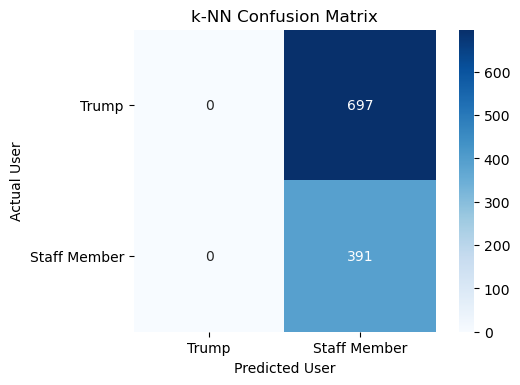

In [121]:
#kNN confusion matrix
kNN_cm = confusion_matrix(y_test, y_pred)

plt.figure(dpi=100)
sns.heatmap(kNN_cm, cmap=plt.cm.Blues, annot=True, square=True, fmt = 'd',
           xticklabels=['Trump','Staff Member'],
           yticklabels=['Trump','Staff Member'])
plt.xlabel('Predicted User')
plt.ylabel('Actual User')
plt.title('k-NN Confusion Matrix')
plt.yticks(rotation=0);

true_neg, false_pos = kNN_cm[0]
false_neg, true_pos = kNN_cm[1]

accuracy = round((true_pos + true_neg) / (true_pos + true_neg + false_pos + false_neg),3)
precision = round((true_pos) / (true_pos + false_pos),3)
recall = round((true_pos) / (true_pos + false_neg),3)
f1 = round(2 * (precision * recall) / (precision + recall),3)

kNN_temp = pd.DataFrame(columns = ['kNN'] , 
                       index = ['Accuracy', 'Precision', 'Recall', 'F1 Score'])

kNN_temp.loc['Accuracy'] = accuracy
kNN_temp.loc['Precision'] = precision
kNN_temp.loc['Recall'] = recall
kNN_temp.loc['F1 Score'] = f1

kNN_temp

In [122]:
results = pd.concat([lr_temp, xgb_temp, rf_temp , kNN_temp] , axis = 1)

results

,LogReg,XGBoost,Random Forest,kNN
Accuracy,0.804,0.858,0.767,0.359
Precision,0.669,0.785,0.608,0.359
Recall,0.9,0.831,0.995,1.0
F1 Score,0.767,0.807,0.755,0.528
